<a href="https://colab.research.google.com/github/brunnagual/arquivos/blob/main/Case_cervejas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
# Importando os dados e armazenando
df = pd.read_csv('/content/Consumo_cerveja.csv')

In [20]:
# Verificando o cabeçalho
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [21]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [22]:
# Verificando quantos dados nulos há
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [23]:
# Apagando os dados nulos
df.dropna(inplace=True)

In [24]:
# Alterando os tipos dos dados
df['Data'] = pd.to_datetime(df['Data'])
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.').astype('float64')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.').astype('float64')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.').astype('float64')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.').astype('float64')
df['Final de Semana'] = df['Final de Semana'].astype('int32')

In [25]:
# Trocando a colula final de semana de valores inteiros para strings
semana = {0:'Dia de semana', 1:'Final de semana'}
df['Final de Semana'] = df['Final de Semana'].apply(lambda x:semana[x])

In [26]:
# Verificando cabeçalho após limpeza a alterações
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,Dia de semana,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,Dia de semana,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,Final de semana,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,Final de semana,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,Dia de semana,28.900


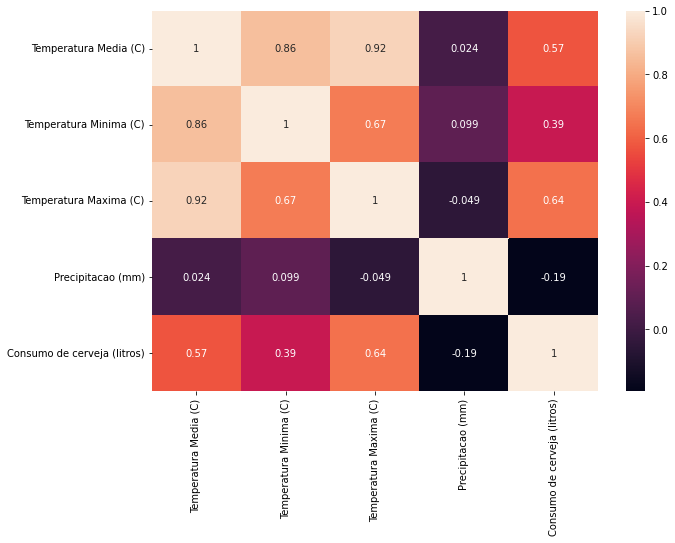

In [27]:
# Verificando correlações entre as colunas
correlacao = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, annot=True)

In [28]:
# Agrupar por mês
df['Mes'] = df['Data'].dt.strftime('%Y-%m')
df_mes = df.groupby(df['Mes'], as_index=False).mean()
df_mes.head()

,Mes,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
0,2015-01,25.218065,21.148387,31.490323,5.038710,28.677645
1,2015-02,23.555000,19.935714,29.007143,9.750000,25.673143
2,2015-03,22.167097,19.012903,27.248387,10.732258,25.036387
3,2015-04,20.837333,17.783333,25.966667,3.603333,24.624100
4,2015-05,18.596774,15.612903,22.867742,1.635484,22.798387


In [29]:
# Analisar as descrições do dataset com o mês agrupado
df_mes.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,21.237599,17.474553,26.621294,5.229283,25.397301
std,2.313696,2.379584,2.653461,3.769193,1.862239
min,17.887097,14.073333,22.832258,0.676667,22.572871
25%,19.574194,15.431452,25.280000,1.983871,24.374842
50%,21.453237,17.801344,26.856667,4.321022,25.435638
75%,22.525339,19.195161,28.114516,8.617500,26.224105
max,25.218065,21.148387,31.490323,10.732258,28.677645


Vizualização dos Dados

Perguntas a serem respondidas:

1 - A temperatura média influencia no consumo?

2 - Se consome mais cerveja em dias de semana ou aos finais de semana?

3 - Qual mês que mais se comsonem cerveja?

In [30]:
df_mes_acd = df_mes.sort_values(by='Temperatura Minima (C)', ascending=True)
trace = go.Scatter(x= df_mes_acd['Temperatura Media (C)'],
                  y = df_mes_acd['Consumo de cerveja (litros)'])

data = [trace]

layout = go.Layout(title='Consumo de Ceveja relacionado a temperatura',
                   xaxis={'title':'Temperatura Media (C)'},
                   yaxis={'title':'Consumo de cerveja (litros)'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

1 - Há uma variação, mas a temperatura influencia no consumo.

In [31]:
df_comsumo_semana = df.groupby(df['Final de Semana'], as_index=False).mean()
df_comsumo_semana

,Final de Semana,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
0,Dia de semana,21.328199,17.567433,26.721073,5.184291,23.998222
1,Final de semana,20.970769,17.195192,26.336538,5.227885,28.922721


In [32]:
trace = go.Pie(labels=df_comsumo_semana['Final de Semana'],
               values=df_comsumo_semana['Consumo de cerveja (litros)'])

data = [trace]

layout = go.Layout(title='Consumo em relação ao dia da semana')

fig = go.Figure (data=data, layout=layout)

py.iplot(fig)

2 - Se consome mais aos finais de semana.

In [33]:
trace = go.Scatter(x = df_mes['Mes'],
                   y = df_mes['Consumo de cerveja (litros)'])

data = [trace]

layout = go.Layout(title='Meses com maiores consumos')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

3 - Mês de Janeiro que mais se consome.